## Importing relevant modules

In [87]:
from selenium import webdriver
from operator import itemgetter as ig 
import matplotlib.pyplot as plt 
from selenium.webdriver.chrome.options import Options
import pandas as pd 
import time

In [88]:
# creating a dictionary to store the scraped data

job_spec = {
    'company': [],
    'title': [],
    'location': [],
    'employment': [],
    'post': []
    }

In [89]:
# filtering by job type
job_type = 'intern'

# specifying the amount of pages we want
num_pages = 100

In [90]:
# setting up webdriver instance
options = Options()

options.add_argument("--headless")

driver = webdriver.Chrome('/Users/kim/Desktop/Personal Python/Automation/Driver/chromedriver 86', options = options)
time.sleep(3)

## Web scraping

Iterating through each page scraping company, title and location info and appending it to the job_spec dictionary

In [91]:
# iterating through each page

for page in range(1, num_pages+1):

    driver.get('https://www.internsg.com/jobs/{}/?f_p&f_i&filter_s='.format(page) + job_type + '#isg-top')

    even_rows = driver.find_elements_by_css_selector('div.ast-row.list-even')
    odd_rows = driver.find_elements_by_css_selector('div.ast-row.list-odd')

    for even in even_rows:

            employment_list = []

            company = even.find_elements_by_css_selector('div.ast-col-md-3')[0].text
            title = even.find_elements_by_css_selector('div.ast-col-md-3')[1].text
            location = even.find_element_by_css_selector('div.ast-col-md-2').text
            post = even.find_element_by_css_selector('div.ast-col-md-1').text

            try:
                employment = even.find_element_by_css_selector('span.text-monospace.badge.badge-info.badge-tooltip.mr-1').text
            except:
                employment = 0
            
            if (employment != 0) and (post != 'Closed'):
                # appending to dictionary
                job_spec['company'].append(company)
                job_spec['title'].append(title)
                job_spec['location'].append(location)
                job_spec['post'].append(post)
                job_spec['employment'].append(employment)
                
    for odd in odd_rows:

            company = odd.find_elements_by_css_selector('div.ast-col-md-3')[0].text
            title = odd.find_elements_by_css_selector('div.ast-col-md-3')[1].text
            location = odd.find_element_by_css_selector('div.ast-col-md-2').text
            post = odd.find_element_by_css_selector('div.ast-col-md-1').text

            try:
                employment = odd.find_element_by_css_selector('span.text-monospace.badge.badge-info.badge-tooltip.mr-1').text
            except:
                employment = 0
            
            if (employment != 0) and (post != 'Closed'):
                # appending to dictionary
                job_spec['company'].append(company)
                job_spec['title'].append(title)
                job_spec['location'].append(location)
                job_spec['post'].append(post)
                job_spec['employment'].append(employment)
            
# close the driver instance
driver.close()

In [92]:
df = pd.DataFrame(job_spec)
df.head()

,company,title,location,employment,post
0,Finquest\nfinquest.com,Research Intern,SG\nWork from Home,Intern/TS,10 Dec
1,SG Interactive Pte Ltd\nsginteractive.com.sg,Business Development Intern,SG,Intern/TS,10 Dec
2,M Connect Pte Ltd\nmconnect-digital.com,Graphic Design Intern,"Downtown Core, SG",Intern/TS,10 Dec
3,Advisors Alliance Group,Financial Services Intern,"Tanjong Pagar, SG",Intern/TS,20 Nov
4,GrowthOps Pte Ltd\ngrowthops.asia,Web Content Publisher - Intern,"Downtown Core, SG\nWork from Home",Intern/TS,10 Dec


## Data Preprocessing

In [93]:
# converting into lower case
lower_df = df.apply(lambda x: x.astype(str).str.lower())

lower_df.head()

,company,title,location,employment,post
0,finquest\nfinquest.com,research intern,sg\nwork from home,intern/ts,10 dec
1,sg interactive pte ltd\nsginteractive.com.sg,business development intern,sg,intern/ts,10 dec
2,m connect pte ltd\nmconnect-digital.com,graphic design intern,"downtown core, sg",intern/ts,10 dec
3,advisors alliance group,financial services intern,"tanjong pagar, sg",intern/ts,20 nov
4,growthops pte ltd\ngrowthops.asia,web content publisher - intern,"downtown core, sg\nwork from home",intern/ts,10 dec


In [94]:
# converting company to a list
lower_df.company = [company.split("\n") for company in lower_df.company]

# converting locations to a list
lower_df.location = [location.split("\n") for location in lower_df.location]

lower_df.head()

,company,title,location,employment,post
0,"[finquest, finquest.com]",research intern,"[sg, work from home]",intern/ts,10 dec
1,"[sg interactive pte ltd, sginteractive.com.sg]",business development intern,[sg],intern/ts,10 dec
2,"[m connect pte ltd, mconnect-digital.com]",graphic design intern,"[downtown core, sg]",intern/ts,10 dec
3,[advisors alliance group],financial services intern,"[tanjong pagar, sg]",intern/ts,20 nov
4,"[growthops pte ltd, growthops.asia]",web content publisher - intern,"[downtown core, sg, work from home]",intern/ts,10 dec


In [95]:
lower_df.shape

(1285, 5)

In [96]:
# removing entries where company website is missing
for index, each in enumerate(lower_df.company):

    if len(each) == 1:
        lower_df.drop(index, inplace=True)

lower_df.shape

(1185, 5)

In [97]:
# splitting the company columns into two didfferent columns
lower_df['company_name'] = lower_df.company.apply(lambda x: x[0])
lower_df['company_website'] = lower_df.company.apply(lambda x: x[1])

# dropping not needed column
clean_df = lower_df.drop('company', axis = 1)

In [101]:
# reordering the columns
clean_df = clean_df[['company_name', 'title', 'employment', 'location', 'company_website', 'post']].reset_index(drop = True)

clean_df.head()

,company_name,title,employment,location,company_website,post
0,finquest,research intern,intern/ts,"[sg, work from home]",finquest.com,10 dec
1,sg interactive pte ltd,business development intern,intern/ts,[sg],sginteractive.com.sg,10 dec
2,m connect pte ltd,graphic design intern,intern/ts,"[downtown core, sg]",mconnect-digital.com,10 dec
3,growthops pte ltd,web content publisher - intern,intern/ts,"[downtown core, sg, work from home]",growthops.asia,10 dec
4,androidsinboots,video editor / videographer intern,intern/ts,"[novena, sg]",androidsinboots.com,10 dec


In [99]:
# converting cleaned data frame to csv file
clean_df.to_csv('intern_positions.csv')

## Data Visualisation & Analysis

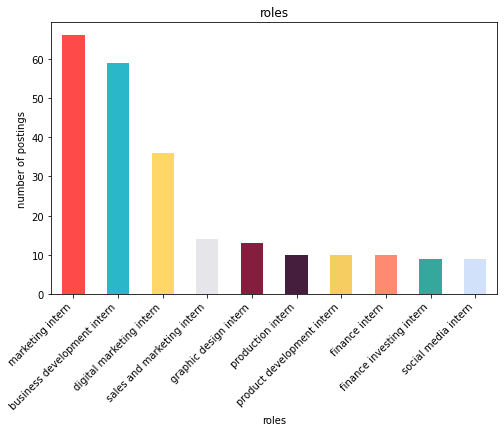

In [110]:
# based on title
title = clean_df.title.value_counts()[:10]

title.plot.bar(figsize = (8,5),
                color = ['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#851e3e', '#451e3e', '#f6cd61', '#fe8a71', '#35a79c', '#d0e1f9'])
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

plt.ylabel('number of postings')
plt.xlabel('roles')
plt.title('roles')

plt.show()

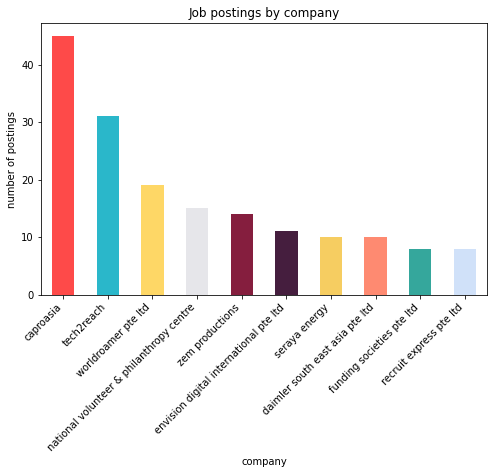

In [113]:
# based on company postings
company = clean_df['company_name'].value_counts()[:10]

company.plot.bar(figsize = (8,5),
                color = ['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#851e3e', '#451e3e', '#f6cd61', '#fe8a71', '#35a79c', '#d0e1f9'])
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

plt.ylabel('number of postings')
plt.xlabel('company')
plt.title('Job postings by company')

plt.show()